In [26]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [2]:
data, meta = arff.loadarff(r"C:\Users\nico_\Desktop\projet csv\MNIST\mnist_784.arff")

X = np.array(data.tolist())

y = X[:, -1]

X = X[:, :-1]

In [3]:
X = X.astype(float)
y = y.astype(int)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Classificateur de type machine à vecteur de support (SVM)

Entraînement sur les 2000 premières images car trop long sur l'ensemble des données

Stratégie avec un classificateur binaire One vs One donc N (nombre de classe) x (N-1)/2 = 10x9/2=45

In [5]:
from sklearn.svm import SVC

In [6]:
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [12]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

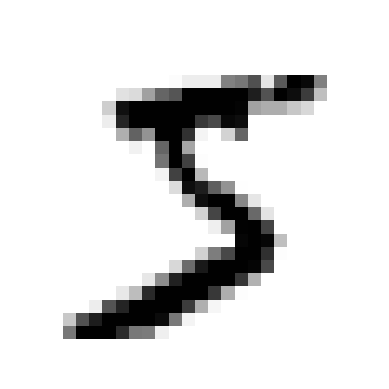

In [13]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [14]:
svm_clf.predict([some_digit])

array([5])

In [16]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [17]:
some_digit_scores.argmax()

5

Renvoie 10 scores par observation, un par classe. Le plus haut score est 9.3 ce qui correspond à la classe 5.

# SGDCClassifier

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3])

In [21]:
sgd_clf.decision_function([some_digit]).round(2)

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

Ce modèle utilise la stratégie one vs rest et est entraîné sur 10 classificateurs binaires 

In [24]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Le modèle a un score de prédiction d'environ 86% 

# Matrice de confusion

In [27]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train, cv=3)

In [29]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

La matrice de confusion contient beaucoup d'éléments car il y a 10 classes à prédire

# Diagramme colorée

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

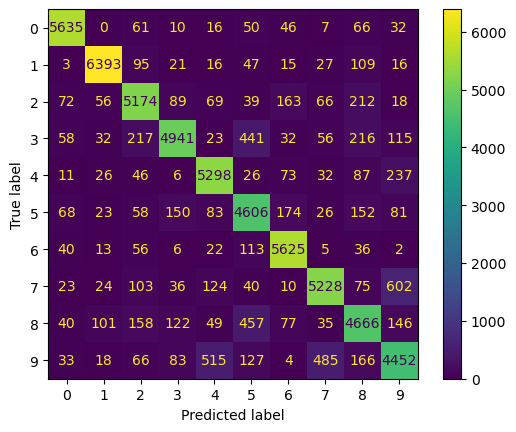

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

Il est important d'équilibrer les classes pour éviter que le modèle fasse des erreurs (nomalize="True")

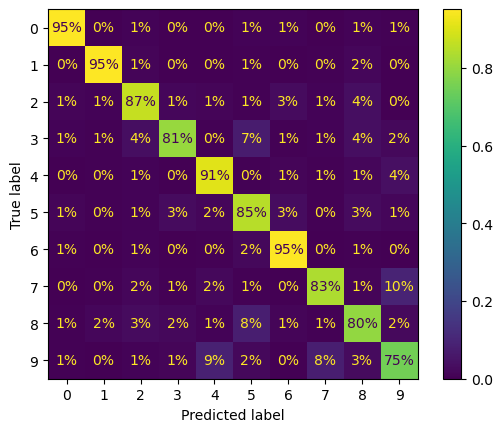

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

Le score le plus bas (75%), montre que le modèle a de légère difficultés à prédire correctement le chiffre 9

Afin que les erreurs ressortent d'avantage, nous pouvons mettre un poids nul sur les prédictions correctes.

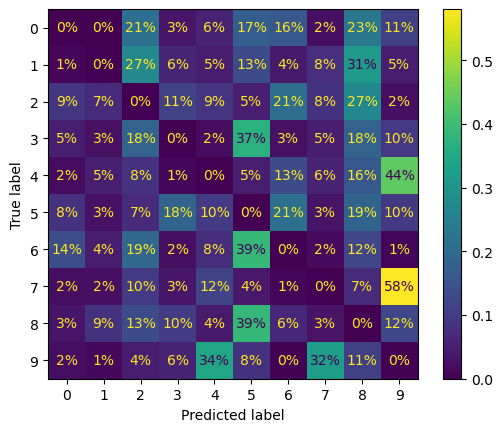

In [45]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight ,normalize="true", values_format=".0%")
plt.show()

La figure nous montre le pourcentage d'erreur faites pour chaque erreur. Pour le chiffre 9, 58% des erreurs que le modèle a faites sur des image de 9 ont été classées par erreur en 7.

Nous pouvons améliorer la matrice de confusion en équilibrant les images en entrée du modèle.